In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


**Data preprocessing**

data link==https://www.kaggle.com/datasets/andonians/random-linear-regression
paste it on kaggle

In [75]:
#loading training data
train_data=pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
print(train_data.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


In [ ]:
#loaDING TESTING DATSET
test_data=pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
print(test_data.head())

In [102]:
#using pandas to learn about data
print(train_data.describe())
print(train_data.info())

            index           x           y
count  699.000000  699.000000  699.000000
mean   349.695279   50.014306   49.939869
std    202.295622   28.954560   29.109217
min      0.000000    0.000000   -3.839981
25%    174.500000   25.000000   24.929968
50%    350.000000   49.000000   48.973020
75%    524.500000   75.000000   74.929911
max    699.000000  100.000000  108.871618
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   699 non-null    int64  
 1   x       699 non-null    float64
 2   y       699 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 16.5 KB
None


In [77]:
#checking for null values in traing data and dropping it
print(train_data.isnull().sum())
train_data.dropna(inplace=True)

#resetting indesx after dropping null values
train_data=train_data.reset_index()
print(train_data.isnull().sum())
train_data.shape

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


(699, 2)

In [79]:
#checking for null values in testing data and dropping it
print(test_data.isnull().sum())
print(test_data.describe())

x    0
y    0
dtype: int64
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


**Data Visualization**

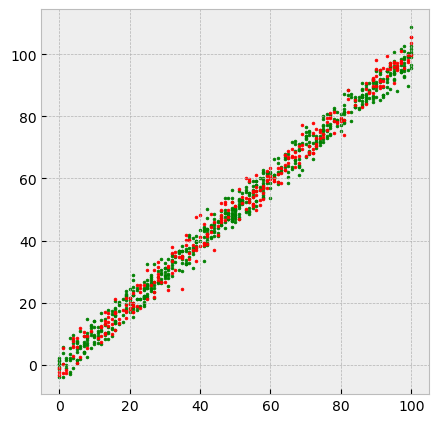

In [80]:
'''
importing matplot library to visualize data.
using scatterplot as data has only 2 featuress
'''
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(train_data.x,train_data.y, s=4,c='g')
ax.scatter(test_data['x'],test_data['y'], s= 4, c= 'r')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


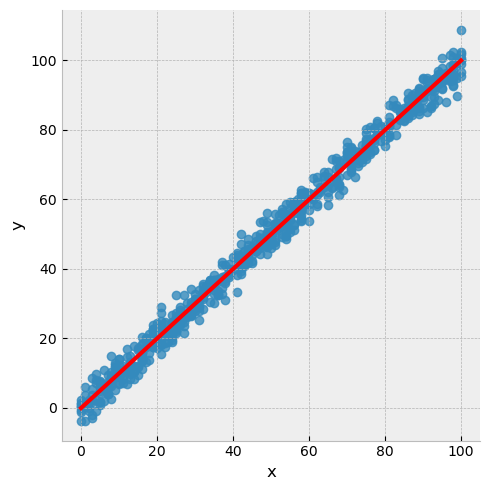

In [81]:
#using seaborn's inbuilt lmplot funcition to draw linear model
import seaborn as sns
sns.lmplot(data=train_data,x='x',y='y',line_kws={'color': 'red'})

**Model declaring**

In [108]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr=LinearRegression()
#transforming s and y into array as model only takes array.
train_x=np.asanyarray(train_data[['x']])
train_y=np.asanyarray(train_data[['y']])
train_y.shape,train_x.shape

((699, 1), (699, 1))

In [83]:
lr.fit(train_x,train_y)

LinearRegression()

visualizing the slope of the model

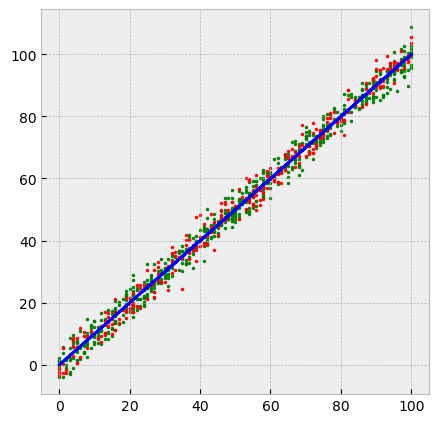

In [107]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(train_data.x,train_data.y, s=4,c='g')
ax.plot(train_data['x'],lr.coef_*train_data[['x']]+lr.intercept_,c='b')
ax.scatter(test_data['x'],test_data['y'], s= 4, c= 'r')
plt.show()

In [93]:
#predicting for test data
test_x=np.asanyarray(test_data[['x']])
test_y=np.asanyarray(test_data[['y']])

predicted=lr.predict(test_x)

measuring different metrics to find error.

In [98]:
from sklearn import metrics

print('mean absolute error : %.4f'%metrics.mean_absolute_error(test_y,predicted))
print('mean_squared_error : %.4f'%metrics.mean_squared_error(test_y,predicted))
print('R2 score : %.4f'%metrics.r2_score(test_y,predicted))

mean absolute error : 2.4158
mean_squared_error : 9.4329
R2 score : 0.9888
